In [1]:
#implementing without custom library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('headbrain.csv')

In [4]:
dataset.shape

(237, 4)

In [5]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
dataset.keys()

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [7]:
x = dataset['Head Size(cm^3)']
y = dataset['Brain Weight(grams)']

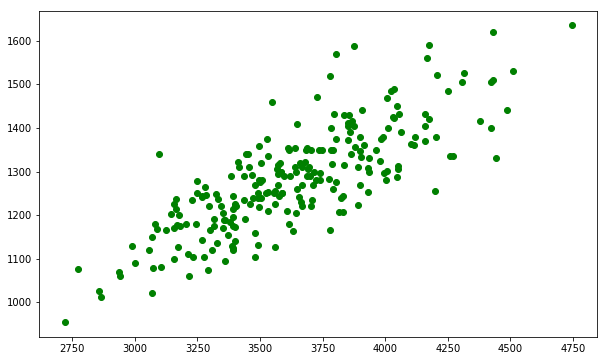

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='g')

In [15]:
mean_x = np.mean(x)
mean_y = np.mean(y)

numer = 0
denom = 0

for i in range(len(x)):
    numer += (y[i]-mean_y)*(x[i]-mean_x)
    denom += (x[i]-mean_x)**2
slope = numer/denom

In [16]:
slope

0.26342933948939945

In [17]:
intercept = mean_y-(slope*mean_x)

In [18]:
intercept

325.57342104944223

In [20]:
predictions = []
for i in range(len(x)):
    y_pred = (slope*x[i])+intercept
    predictions.append(y_pred)

In [21]:
for i in range(10):
    print('Actual: {},Prediction: {}'.format(y[i],predictions[i]))

Actual: 1530,Prediction: 1514.1666008256125
Actual: 1297,Prediction: 1310.2722920608173
Actual: 1335,Prediction: 1448.0458366137732
Actual: 1282,Prediction: 1320.546036300904
Actual: 1590,Prediction: 1425.9177720966638
Actual: 1300,Prediction: 1269.9676031189392
Actual: 1400,Prediction: 1322.6534710168191
Actual: 1255,Prediction: 1263.118440292215
Actual: 1355,Prediction: 1277.3436246246424
Actual: 1375,Prediction: 1374.549050896231


In [23]:
mse = 0
for i in range(len(x)):
    mse+=(y[i]-predictions[i])**2
mse =mse/len(x)

In [24]:
mse

5201.38402800233

In [25]:
rmse = np.sqrt(mse)

In [26]:
rmse

72.1206213783709

Text(0, 0.5, 'Brain Weight(grams)')

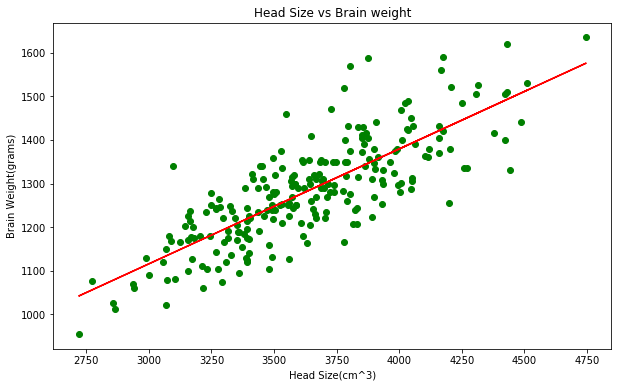

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='g')
plt.plot(x,predictions,'r')
plt.title('Head Size vs Brain weight')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')

In [29]:
#To check or mactch the values of slope and intercept with that of built in library

In [30]:
from scipy.stats import linregress

In [31]:
linregress(x,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

In [32]:
#implmenting linear Regression using python standard library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [38]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values
X = X.reshape(-1,1)
regression.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
regression = LinearRegression()
regression.fit(X,Y)
predictions = regression.predict(X)
for i in range(10):
    print('Actual: {},Predictions: {}'.format(y[i],predictions[i]))

Actual: 1530,Predictions: 1514.1666008256125
Actual: 1297,Predictions: 1310.2722920608173
Actual: 1335,Predictions: 1448.0458366137732
Actual: 1282,Predictions: 1320.5460363009038
Actual: 1590,Predictions: 1425.9177720966636
Actual: 1300,Predictions: 1269.9676031189392
Actual: 1400,Predictions: 1322.6534710168191
Actual: 1255,Predictions: 1263.118440292215
Actual: 1355,Predictions: 1277.3436246246424
Actual: 1375,Predictions: 1374.5490508962307


Text(0, 0.5, 'Brain Weight(grams)')

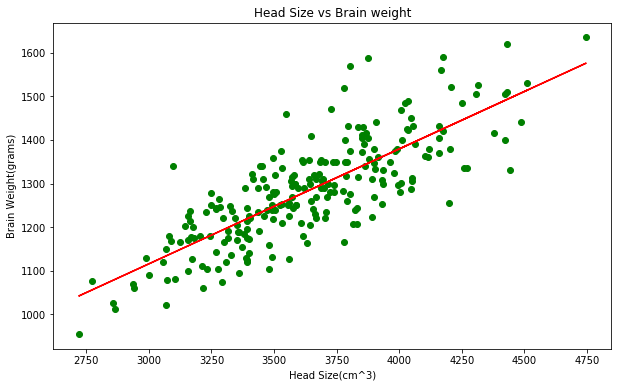

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='g')
plt.plot(X,predictions,'r')
plt.title('Head Size vs Brain weight')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')

In [42]:
#errors
mse = mean_squared_error(Y,predictions)
absl = mean_absolute_error(Y,predictions)

In [43]:
rmse = np.sqrt(mse)

In [44]:
print(mse,rmse,absl)

5201.3840280023305 72.1206213783709 56.36724079565055


In [46]:
#Data Preprocessing-Train Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.21)

In [48]:
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
predictions = regression.predict(x_test)

In [53]:
for i in range(10):
    print('Actual: {},Predictions: {}'.format(y_train[i],predictions[i]))

Actual: 1280,Predictions: 1192.9887601302867
Actual: 1250,Predictions: 1188.2739092997695
Actual: 1324,Predictions: 1158.4131873731617
Actual: 1175,Predictions: 1320.027796396996
Actual: 1506,Predictions: 1288.3335213696314
Actual: 1165,Predictions: 1198.4894194325566
Actual: 1350,Predictions: 1295.1438614581562
Actual: 1275,Predictions: 1199.7991002188114
Actual: 1440,Predictions: 1318.7181156107413
Actual: 1226,Predictions: 1337.8394550900603


In [54]:
mse = mean_squared_error(y_test,predictions)
absl = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)
print(mse,rmse,absl)

3409.3221511278716 58.3894010170328 49.18837896532969
